<a href="https://colab.research.google.com/github/TriDuks/AIXuLyAnh/blob/main/DuDoanTuongLaiBangKhuonMat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
#importing libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical, load_img, img_to_array

#Preprocessing để Training 
# Load ảnh, chia loại, định lại cỡ ảnh 30x40, rescale ảnh và định dạng ảnh về binary
train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True
                                  )
train_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/AI/Name_class/Training', 
                                                 target_size = (30,40), 
                                                 batch_size = 32, 
                                                 class_mode = 'categorical')

Found 944 images belonging to 16 classes.


In [8]:
# Load ảnh, chia loại, định lại cỡ ảnh 30x40, rescale ảnh và định dạng ảnh về binary
test_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True
                                  )
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/AI/Name_class/Test', 
                                                
                                                 target_size = (30,40), 
                                                 batch_size = 32, 
                                                class_mode = 'categorical')
training_set.class_indices
test_set.class_indices

Found 45 images belonging to 16 classes.


{'CPhi': 0,
 'Chi': 1,
 'Chuong': 2,
 'Dong': 3,
 'DuyThanh': 4,
 'Hieu': 5,
 'MPhi': 6,
 'NHuy': 7,
 'Nam': 8,
 'Phong': 9,
 'Thang ': 10,
 'Tri': 11,
 'Tu': 12,
 'Tuan': 13,
 'Tung': 14,
 'VBinh': 15}

**CNN**

---


In [9]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, Normalization
import keras.backend as K
from keras.layers import LeakyReLU
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras.optimizers import Adam

# Tạo model
model = Sequential()
#Thêm lớp chuyển đổi
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=[30,40,3],padding='same')) #3 kênh màu RGB
model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))
#Pooling
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))
#Tích chập lớp thứ 2
model.add(Conv2D(64,(3,3), activation = 'relu',padding='same'))
model.add(Conv2D(64,(3,3), activation = 'relu',padding='same'))
model.add(Dropout( 0.1))
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))

model.add(Conv2D(128,(3,3), activation = 'relu',padding='same'))
model.add(Conv2D(128,(3,3), activation = 'relu',padding='same'))
model.add(LeakyReLU(alpha = 0.2))
model.add(MaxPooling2D(pool_size=(2,2) , padding = 'same'))
#Làm phẳng
model.add(Flatten())
  # ANN Layer
#Connect
model.add(Dense(128, activation='relu'))
model.add(LeakyReLU(alpha = 0.2))
model.add(Dense(32, activation='relu'))
model.add(LeakyReLU(alpha = 0.1))

#Output
model.add(Dense(16, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 40, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 40, 32)        9248      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 30, 40, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 20, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 15, 20, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 15, 20, 64)        36928     
                                                      

In [10]:

# Thiết lập thông số
from keras.optimizers import Adam
model.compile( loss = 'categorical_crossentropy', optimizer=Adam(), metrics = ['accuracy'])


In [11]:
# Huấn luyện
# fit the model
# Run the cell. It will take some time to execute
a = model.fit_generator( training_set, validation_data=test_set, epochs=80, steps_per_epoch=len(training_set), 
                        validation_steps=len(test_set)
)

<ipython-input-11-396911b85743>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  a = model.fit_generator( training_set, validation_data=test_set, epochs=80, steps_per_epoch=len(training_set),


Epoch 1/80
30/30 [==============================] - 675s 22s/step - loss: 2.7365 - accuracy: 0.1102 - val_loss: 2.6631 - val_accuracy: 0.1111
Epoch 2/80
30/30 [==============================] - 6s 204ms/step - loss: 1.7849 - accuracy: 0.4195 - val_loss: 1.7008 - val_accuracy: 0.4222
Epoch 3/80
30/30 [==============================] - 7s 250ms/step - loss: 0.4964 - accuracy: 0.8623 - val_loss: 1.2730 - val_accuracy: 0.6444
Epoch 4/80
30/30 [==============================] - 6s 205ms/step - loss: 0.2624 - accuracy: 0.9333 - val_loss: 1.4693 - val_accuracy: 0.7111
Epoch 5/80
30/30 [==============================] - 7s 250ms/step - loss: 0.1518 - accuracy: 0.9640 - val_loss: 1.1308 - val_accuracy: 0.7111
Epoch 6/80
30/30 [==============================] - 7s 220ms/step - loss: 0.0879 - accuracy: 0.9756 - val_loss: 2.0141 - val_accuracy: 0.6000
Epoch 7/80
30/30 [==============================] - 6s 202ms/step - loss: 0.0608 - accuracy: 0.9820 - val_loss: 2.6048 - val_accuracy: 0.5778
Epoch 

In [15]:
model.evaluate(test_set)


2/2 [==============================] - 1s 39ms/step - loss: 2.0084 - accuracy: 0.7111


[2.0083537101745605, 0.7111111283302307]

In [12]:
training_set.class_indices

{'CPhi': 0,
 'Chi': 1,
 'Chuong': 2,
 'Dong': 3,
 'DuyThanh': 4,
 'Hieu': 5,
 'MPhi': 6,
 'NHuy': 7,
 'Nam': 8,
 'Phong': 9,
 'Thang': 10,
 'Tri': 11,
 'Tu': 12,
 'Tuan': 13,
 'Tung': 14,
 'VBinh': 15}

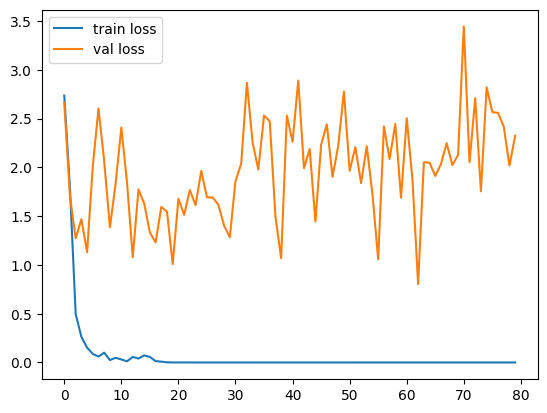

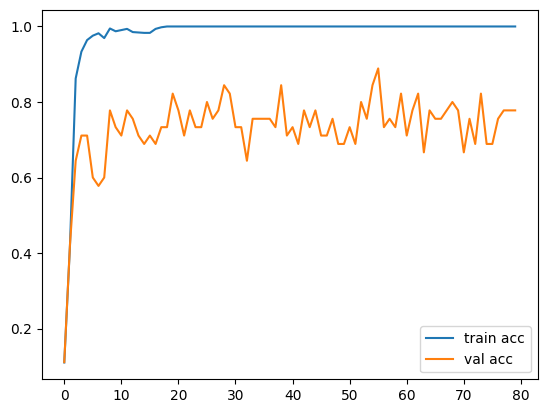

<Figure size 640x480 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(a.history['loss'], label='train loss')
plt.plot(a.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(a.history['accuracy'], label='train acc')
plt.plot(a.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# Lưu a h5 file
from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/AI/Name_class/model_inception.h5')


from tensorflow.keras.preprocessing import image
model=load_model('/content/drive/MyDrive/AI/Name_class/model_inception.h5')
model

import os
os.chdir('/content/drive/MyDrive/AI/Name_class/Valid')

!ls

**Test**

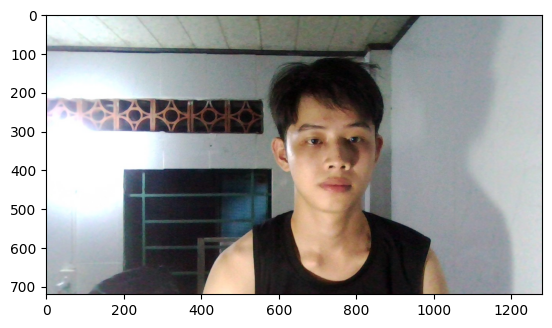

In [21]:

import matplotlib.pyplot as plt
from keras.utils import to_categorical, load_img, img_to_array
img_data = load_img('/content/drive/MyDrive/AI/Name_class/Valid/Tri.jpg')
img_data = img_to_array(img_data)
plt.imshow(img_data/255)

In [ ]:

training_set.class_indices